<a href="https://colab.research.google.com/github/nissi31/fmml-projects-and-labs-Nissi/blob/main/FMML_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting features from data

FMML Module 1, Lab 1

> Exercise: Try to extract trigrams and visualize the top 10 trigrams for each text.

In [ ]:
!pip -q install wikipedia nltk matplotlib plotly pandas

import re
import nltk
import wikipedia
import numpy as np
import unicodedata
import pandas as pd
import plotly.express as px
from nltk.util import ngrams
import matplotlib.pyplot as plt
from collections import Counter

  Preparing metadata (setup.py) ... done


# Part 1: Features of text

Computures can't understand text. They can only process numbers. So, the logical first step in any attempt to analyze text is to convert it into numbers. This process is called **feature extraction** or **vectorization**. In this lab, we will try some simple methods for feature extraction.

First, let us download a 2 documents from Wikipedia in two different languages, English and French. We will then extract features from the text in these documents.

In [ ]:
wikipedia.set_lang("en")

eng1 = wikipedia.page("Giraffe").content
eng2 = wikipedia.page("Elephant").content

wikipedia.set_lang("fr")
fr1 = wikipedia.page("Giraffe").content
fr2 = wikipedia.page("Elephant").content

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [ ]:
def cleanup(text):
    text = text.lower()  # make it lowercase
    text = re.sub(r"[^a-z\s]", "", text)  # only keep characters in a-z range and whitespaces
    return text

In [ ]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

In [ ]:
eng2[:500]

'elephants are the largest living land animals three living species are currently recognised the african bush elephant loxodonta africana the african forest elephant l cyclotis and the asian elephant elephas maximus they are the only surviving members of the family elephantidae and the order proboscidea extinct relatives include mammoths and mastodons distinctive features of elephants include a long proboscis called a trunk tusks large ear flaps pillarlike legs and tough but sensitive grey skin t'

In [ ]:
fr2[:500]

'les lphants sont des mammifres proboscidiens de la famille des lphantids ils correspondent aujourdhui  trois espces rparties en deux genres distincts llphant de savane dafrique et llphant de fort dafrique autrefois regroups sous la mme espce d lphant dafrique  appartiennent au genre loxodonta tandis que llphant dasie anciennement appel  lphant indien  appartient au genre elephas ils se diffrencient par certaines caractristiques anatomiques les lphants dasie tant en gnral plus petits avec des ore'

Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on.

Let us count the frequency of each character in a text and plot it in a histogram.

In [ ]:
def tuple2string(tup):
    return ''.join(tup)

def key2string(keys):
    return [tuple2string(i) for i in keys]

def get_ngram_freq(ngram):
    keys = key2string(ngram.keys())
    values = list(ngram.values())
    combined = zip(keys, values)
    zipped_sorted = sorted(combined, key=lambda x: x[0])
    keys, values = map(list, zip(*zipped_sorted))
    return keys, values

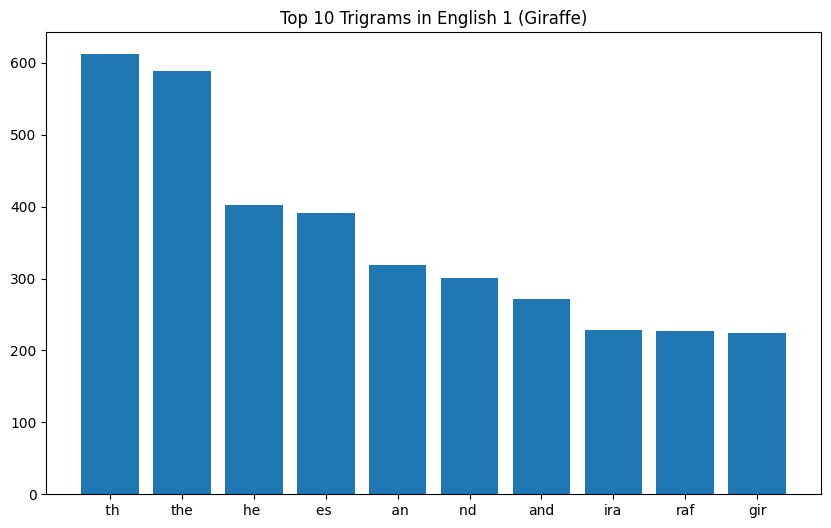

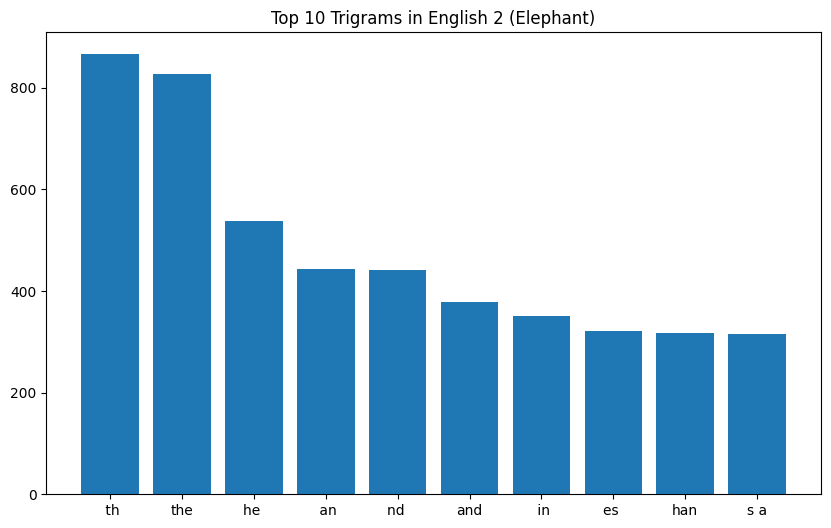

In [ ]:
def show_top_n_trigrams(ngram, n=10):
    return Counter(ngram).most_common(n)

def visualize_trigrams(text, title):
    trigrams = Counter(ngrams(text, 3))
    top_trigrams = show_top_n_trigrams(trigrams)
    labels, values = zip(*top_trigrams)
    labels = [''.join(label) for label in labels]

    plt.figure(figsize=(10, 6))
    plt.bar(labels, values)
    plt.title(f"Top 10 Trigrams in {title}")
    plt.show()

# Visualize trigrams for each text
visualize_trigrams(eng1, "English 1 (Giraffe)")
visualize_trigrams(eng2, "English 2 (Elephant)")

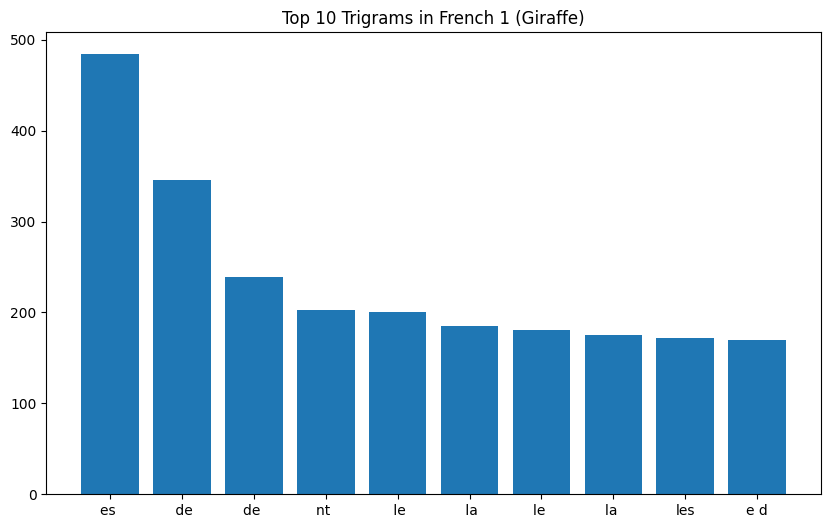

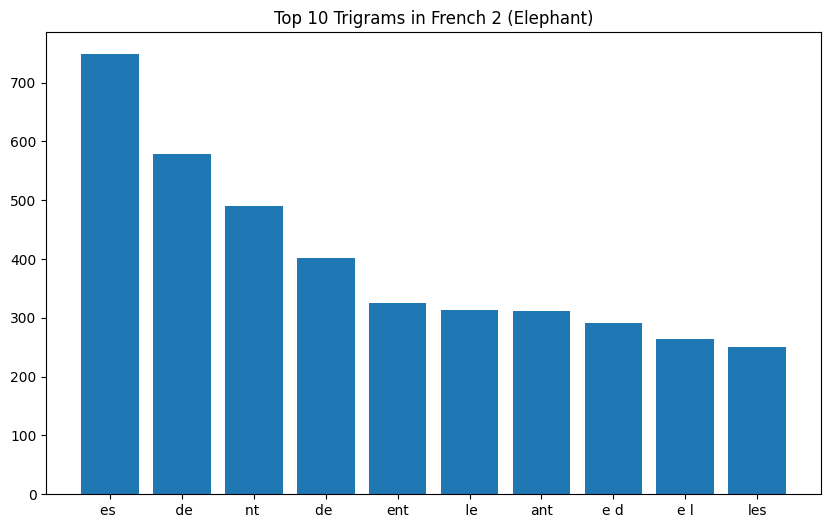

In [ ]:
visualize_trigrams(fr1, "French 1 (Giraffe)")
visualize_trigrams(fr2, "French 2 (Elephant)")

In [ ]:
def get_2D_trigram_freq(trigrams):
    freq = np.zeros((26, 26, 26))
    for (a, b, c), count in trigrams.items():
        if 'a' <= a <= 'z' and 'a' <= b <= 'z' and 'a' <= c <= 'z':
            i = ord(a) - ord('a')
            j = ord(b) - ord('a')
            k = ord(c) - ord('a')
            freq[i, j, k] = count
    return freq

In [ ]:
def show_top_n(bifreq, n=10):
    f = bifreq.flatten()
    arg = np.argsort(-f)
    for ii in range(n):
        i = arg[ii] // (26 * 26)
        j = (arg[ii] % (26 * 26)) // 26
        k = arg[ii] % 26
        print(f"{chr(i + ord('a'))}{chr(j + ord('a'))}{chr(k + ord('a'))} : {f[arg[ii]]}")


In [ ]:
print("\nTop 10 Trigrams for English 1 (Giraffe):")
show_top_n(get_2D_trigram_freq(Counter(ngrams(eng1, 3))))

print("\nTop 10 Trigrams for English 2 (Elephant):")
show_top_n(get_2D_trigram_freq(Counter(ngrams(eng2, 3))))

print("\nTop 10 Trigrams for French 1 (Giraffe):")
show_top_n(get_2D_trigram_freq(Counter(ngrams(fr1, 3))))

print("\nTop 10 Trigrams for French 2 (Elephant):")
show_top_n(get_2D_trigram_freq(Counter(ngrams(fr2, 3))))


Top 10 Trigrams for English 1 (Giraffe):
the : 589.0
and : 272.0
ira : 229.0
raf : 227.0
gir : 225.0
aff : 223.0
ffe : 205.0
ing : 202.0
ion : 140.0
mal : 123.0

Top 10 Trigrams for English 2 (Elephant):
the : 828.0
and : 378.0
han : 318.0
ant : 304.0
ing : 295.0
ele : 293.0
pha : 292.0
eph : 285.0
lep : 285.0
nts : 205.0

Top 10 Trigrams for French 1 (Giraffe):
les : 172.0
ent : 161.0
raf : 134.0
ira : 133.0
gir : 130.0
que : 128.0
ion : 108.0
afe : 104.0
des : 100.0
lle : 95.0

Top 10 Trigrams for French 2 (Elephant):
ent : 326.0
ant : 312.0
les : 251.0
pha : 212.0
han : 206.0
lph : 195.0
que : 175.0
des : 157.0
ion : 139.0
ont : 131.0


##2.Written Numbers

> Exercise: Remember we took a subset of only the first two numbers in MNIST? Include 5 or more numbers now and try to visualise which feature works best when multiple numbers are involved. Brownie points if you use all numbers :)

Loading the dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
import pandas as pd
import plotly.express as px

(train_X, train_y), (test_X, test_y) = mnist.load_data()

No of classes to consider:

In [ ]:
classes_to_include = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Filter the dataset to include only the specified classes

In [ ]:
filtered_train_X = np.concatenate([train_X[train_y == i] for i in classes_to_include])
filtered_train_y = np.concatenate([train_y[train_y == i] for i in classes_to_include])

Visualize some examples of each digit

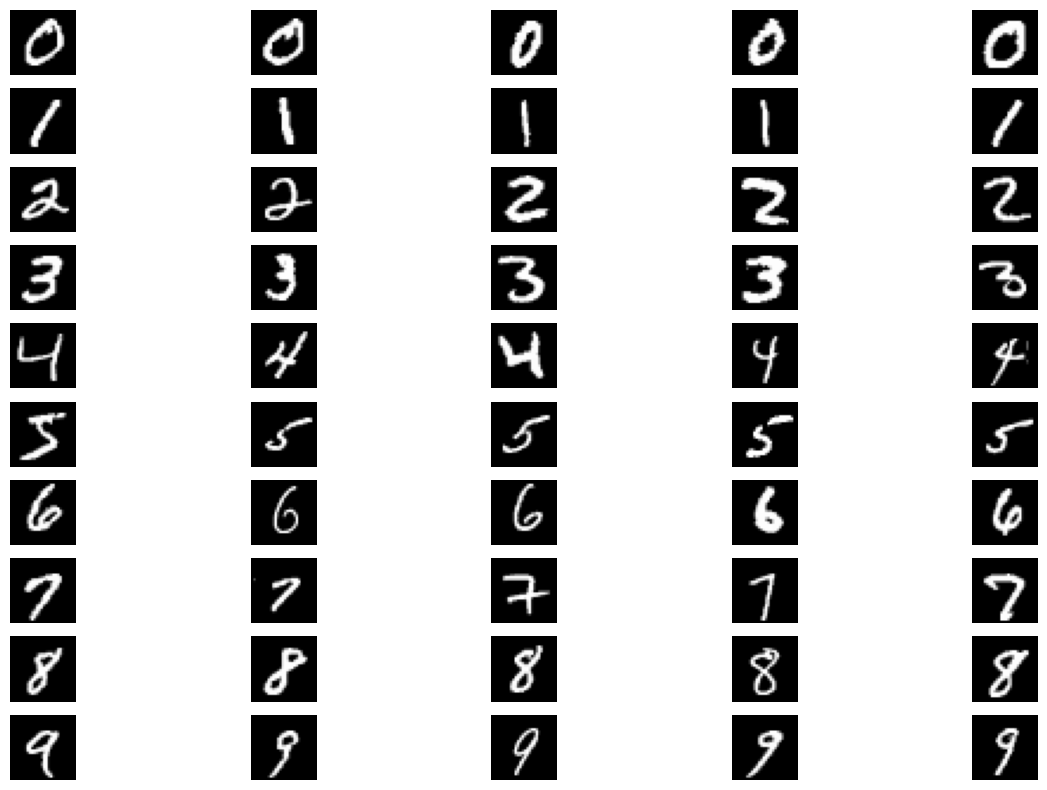

In [ ]:
fig, axs = plt.subplots(len(classes_to_include), 5, figsize=(15, 10))

for i, digit in enumerate(classes_to_include):
    digit_imgs = filtered_train_X[filtered_train_y == digit]
    for j in range(5):
        axs[i, j].imshow(digit_imgs[j], cmap='gray')
        axs[i, j].axis('off')
plt.show()

Feature calculation functions

In [ ]:
def cumArray(img):
    img2 = img.copy()
    for ii in range(1, img2.shape[1]):
        img2[ii, :] = img2[ii, :] + img2[ii - 1, :]
    img2 = img2 > 0
    return img2

def getHolePixels(img):
    im1 = cumArray(img)
    im2 = np.rot90(cumArray(np.rot90(img)), 3)
    im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
    hull = im1 & im2 & im3 & im4
    hole = hull & ~(img > 0)
    return hole

def getHullPixels(img):
    im1 = cumArray(img)
    im2 = np.rot90(cumArray(np.rot90(img)), 3)
    im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
    hull = im1 & im2 & im3 & im4
    return hull

def minus(a, b):
    return a & ~b

def getBoundaryPixels(img):
    img = img.copy() > 0
    rshift = np.roll(img, 1, 1)
    lshift = np.roll(img, -1, 1)
    ushift = np.roll(img, -1, 0)
    dshift = np.roll(img, 1, 0)
    boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
    return boundary


Calculate features for all digits

In [ ]:
sum_values = np.array([np.sum(img > 0) for img in filtered_train_X])
hull_values = np.array([getHullPixels(img).sum() for img in filtered_train_X])
hole_values = np.array([getHolePixels(img).sum() for img in filtered_train_X])
boundary_values = np.array([getBoundaryPixels(img).sum() for img in filtered_train_X])


Visualize histograms for features:

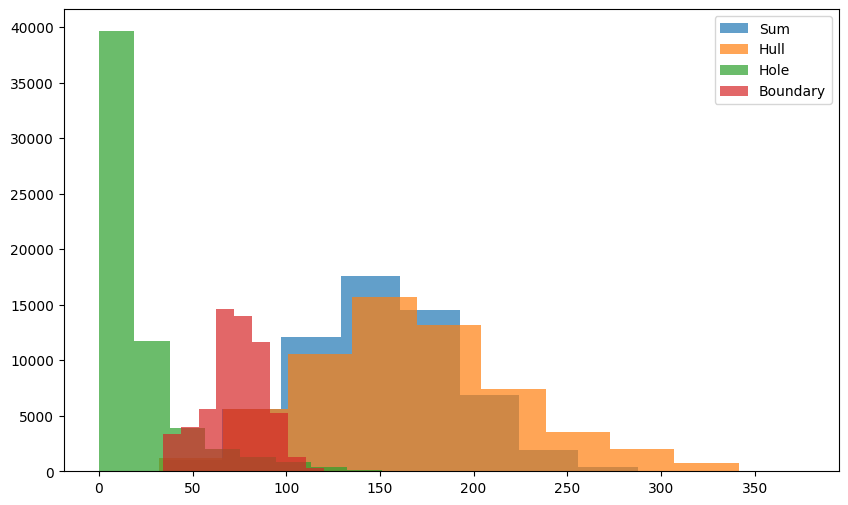

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(sum_values, alpha=0.7, label='Sum')
plt.hist(hull_values, alpha=0.7, label='Hull')
plt.hist(hole_values, alpha=0.7, label='Hole')
plt.hist(boundary_values, alpha=0.7, label='Boundary')
plt.legend()
plt.show()

Create scatter plots to visualize feature separation

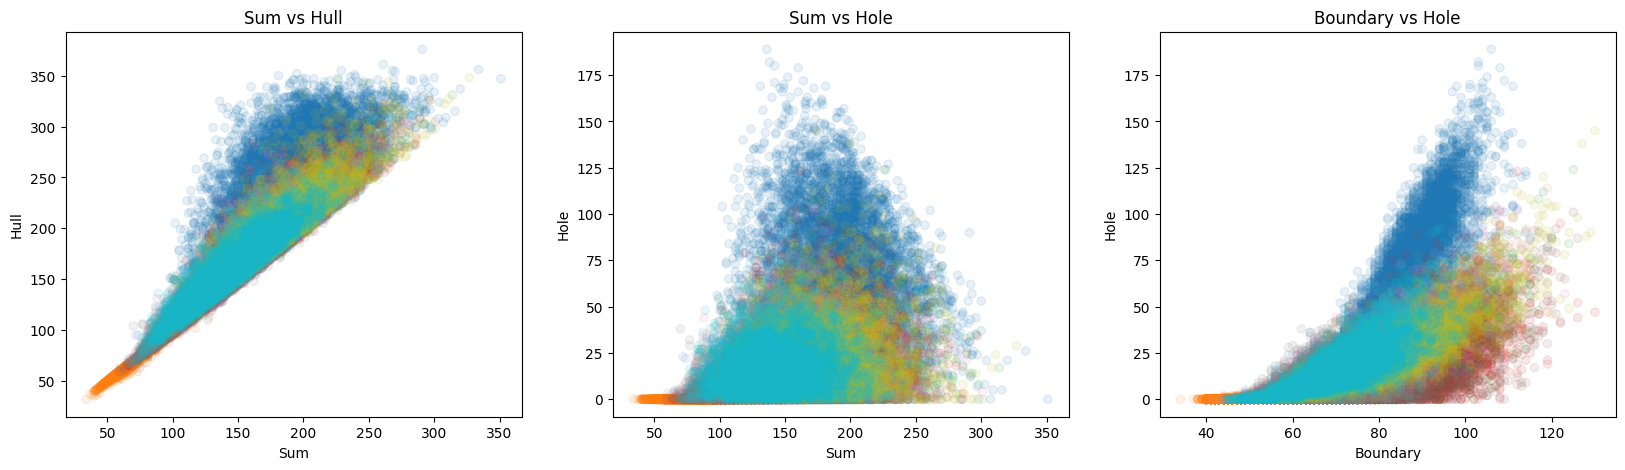

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].scatter(sum_values, hull_values, alpha=0.1, c=filtered_train_y, cmap='tab10')
axs[0].set_xlabel("Sum")
axs[0].set_ylabel("Hull")
axs[0].set_title("Sum vs Hull")

axs[1].scatter(sum_values, hole_values, alpha=0.1, c=filtered_train_y, cmap='tab10')
axs[1].set_xlabel("Sum")
axs[1].set_ylabel("Hole")
axs[1].set_title("Sum vs Hole")

axs[2].scatter(boundary_values, hole_values, alpha=0.1, c=filtered_train_y, cmap='tab10')
axs[2].set_xlabel("Boundary")
axs[2].set_ylabel("Hole")
axs[2].set_title("Boundary vs Hole")
plt.show()

Prepare data for 3D visualization

In [ ]:
cl = [f'class {i}' for i in filtered_train_y]
df = pd.DataFrame(
    list(zip(hole_values, sum_values, boundary_values, cl)),
    columns=["Hole", "Sum", "Boundary", "Class"]
)

3D scatter plot

In [ ]:
fig = px.scatter_3d(df, x="Hole", y="Sum", z="Boundary", color="Class", opacity=0.1)
fig.show()